In [1]:
import numpy as np
import pandas as pd

In [5]:
df_s = pd.DataFrame(dict(v1 = [100, 200, 300],
                         v2 = [400, 500, 600],
                         shape = ["A", "B", "C"]))
df_s

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [6]:
df_s.iloc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B

In [7]:
df_s.loc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [8]:
df_s.v1

0    100
1    200
2    300
Name: v1, dtype: int64

In [9]:
df_s.shape

(3, 3)

In [ ]:
df_s["shape"]

In [13]:
df_s.iloc[:, :-1]

v1   v2
0  100  400
1  200  500
2  300  600

In [14]:
df_s.loc[:, "v2":]

v2 shape
0  400     A
1  500     B
2  600     C

In [15]:
df_s.loc[df_s["v1"] == 200, ]

v1   v2 shape
1  200  500     B

In [16]:
df_s.loc[df_s["v1"] != 200, ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [17]:
df_s["v1"] == 200

0    False
1     True
2    False
Name: v1, dtype: bool

In [18]:
~(df_s["v1"] == 200)

0     True
1    False
2     True
Name: v1, dtype: bool

In [19]:
df_s.loc[~(df_s["v1"] == 200), ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [20]:
df_s.loc[(df_s["v1"] == 200) & (df_s["v2"] == 600), ]

Empty DataFrame
Columns: [v1, v2, shape]
Index: []

In [21]:
df_s.loc[(df_s["v1"] == 200) | (df_s["v2"] == 600), ]

v1   v2 shape
1  200  500     B
2  300  600     C

In [22]:
condi_1 = df_s["v1"] == 200
condi_2 = df_s["v2"] == 500
df_s.loc[condi_1 & condi_2, ]

v1   v2 shape
1  200  500     B

In [23]:
df_s.loc[(df_s["shape"] == "A") | (df_s["shape"] == "C"), ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [24]:
df_s.loc[df_s["shape"].isin(["A", "C"]), ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [25]:
df_s.loc[~df_s["shape"].isin(["A", "C"]), ]

v1   v2 shape
1  200  500     B

In [26]:
df_s.columns

Index(['v1', 'v2', 'shape'], dtype='object')

In [27]:
df_s.columns.to_list()

['v1', 'v2', 'shape']

할당(assign)

In [28]:
df_s2 = df_s.rename(columns = {"shape": "type"})
df_s2

v1   v2 type
0  100  400    A
1  200  500    B
2  300  600    C

In [29]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

In [35]:
df_sub = df.loc[df["지수명"] == "KRX 300", ]
# df_sub

In [37]:
df.loc[df["종가"] == df["종가"].max(), ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [38]:
df["종가"].idxmax()

117

In [39]:
df.loc[df["종가"].idxmax(), ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [40]:
df.loc[[df["종가"].idxmax()], ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [2]:
df = pd.read_csv("iris_missing.csv")
df_sub = df.head()
df_sub

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
df_sub.info() # 특정 버전에서 에러로 안될 수 있음.

In [ ]:
df_sub.dtypes

In [ ]:
df_sub.count()

In [48]:
df_sub.isna().sum() # ⭐⭐⭐

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [50]:
df_sub.isna().sum(axis = 1)

0    2
1    0
2    0
3    0
4    0
dtype: int64

In [51]:
df_sub1 = df_sub.loc[df_sub["Sepal.Width"].isna(), ]
df_sub1

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          NaN           NaN          0.2  setosa

In [52]:
df_sub2 = df_sub.loc[df_sub["Sepal.Width"].notna(), ]
df_sub2

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [53]:
df_sub3 = df_sub.dropna()
df_sub3

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [55]:
df_sub.loc[:, "Sepal.Width"] = df_sub["Sepal.Width"].fillna(-999)
# df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())
df_sub.loc[:, "Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())
df_sub

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
df_sub2 = df.head().copy()
df_sub2["Petal.Length"] = df_sub2["Petal.Length"].fillna(df_sub2["Petal.Length"].mean())
df_sub2

In [ ]:
df_sub3 = df.head().reset_index(drop = True)
df_sub3["Petal.Length"] = df_sub3["Petal.Length"].fillna(df_sub3["Petal.Length"].mean())
df_sub3

In [61]:
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           NaN          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
df_sub4 = df.head().copy()
df_sub4.set_index("Species").reset_index() # 기존 변수의 위치에 관계 없이 가장 앞으로 옮길 수 있음.
# 머신러닝 시 종속변수를 가장 앞으로 옮기는데 유용함.

Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  setosa           5.1          NaN           NaN          0.2
1  setosa           4.9          3.0           1.4          0.2
2  setosa           4.7          3.2           1.3          0.2
3  setosa           4.6          3.1           1.5          0.2
4  setosa           5.0          3.6           1.4          0.2

* 정렬: https://datadoctorblog.com/2023/04/25/Py-Basic-Pandas-Sorting/
* 원소/조합 세기: https://datadoctorblog.com/2023/04/04/Py-Basic-Pandas-Counting/

In [ ]:
df = pd.read_csv("bike.csv")
df.head(1)

In [6]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
df["season"].nunique()

4

In [8]:
df["season"].drop_duplicates()

0       1
1323    2
2690    3
4055    4
Name: season, dtype: int64

In [11]:
# df.loc[1322:1324, ]

In [12]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [13]:
df["season"].value_counts(normalize = True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

In [ ]:
df[["season", "holiday"]].drop_duplicates()

In [20]:
pd.crosstab(df["season"], df["holiday"])

holiday     0   1
season           
1        2615  71
2        2685  48
3        2637  96
4        2638  96

In [22]:
df_sub = df.loc[(df["season"] == 1) & (df["holiday"] == 1), ]
len(df_sub)

71

In [23]:
sum((df["season"] == 1) & (df["holiday"] == 1))

71

* .groupby(): https://datadoctorblog.com/2023/04/28/Py-Basic-Pandas-Groupby/

In [ ]:
df = pd.read_csv("diamonds.csv")
df.head(2)

In [ ]:
df.loc[:, "price"].agg(["mean"])

In [ ]:
df.loc[:, "price"].agg(["max", "mean"])

In [ ]:
df.groupby("cut")["price"].max()

In [ ]:
df_g = df.groupby("cut")["price"].max().reset_index()
df_g

In [ ]:
df.groupby("cut")["price"].agg(["max", "min"])

In [ ]:
df.groupby(["cut", "color"])["price"].agg(["max", "min"])

In [ ]:
df.groupby("cut")[["price", "carat"]].min()

In [37]:
df_g2 = df.groupby("cut")[["price", "carat"]].agg({"price": "max", 
                                                   "carat": "min"}).reset_index() # 시험 기출 유형🎯
df_g2

cut  price  carat
0       Fair  18574   0.22
1       Good  18788   0.23
2      Ideal  18806   0.20
3    Premium  18823   0.20
4  Very Good  18818   0.20

* 문자 데이터: https://datadoctorblog.com/2023/04/20/Py-Basic-Pandas-String-Data/

In [40]:
df_tx = pd.DataFrame(dict(v1 = [100, 200, 300],
                          v2 = ["abc", "aaa", "ccc"],
                          v3 = [123, "1234-5678", "010-1234-5678"]))
df_tx

v1   v2             v3
0  100  abc            123
1  200  aaa      1234-5678
2  300  ccc  010-1234-5678

In [ ]:
df_tx["v2"].replace("a", "🌍")

In [ ]:
df_tx["v2"].replace("aaa", "ㅋ")

In [ ]:
df_tx["v2"].replace({"aaa": "🌍", "ccc": "🧊"})

In [46]:
df_tx["v2"].str.replace("a", "🧊")

0    🧊bc
1    🧊🧊🧊
2    ccc
Name: v2, dtype: object

In [45]:
df_tx["v2"].str.replace("aaa", "🧊")

0    abc
1      🧊
2    ccc
Name: v2, dtype: object

In [47]:
df_tx["v2"].str.contains("a")

0     True
1     True
2    False
Name: v2, dtype: bool

In [48]:
~df_tx["v2"].str.contains("a")

0    False
1    False
2     True
Name: v2, dtype: bool

In [51]:
df_tx.loc[df_tx["v2"].str.contains("a"), ]

v1   v2         v3
0  100  abc        123
1  200  aaa  1234-5678

In [52]:
df_tx.loc[~df_tx["v2"].str.contains("a"), ]

v1   v2             v3
2  300  ccc  010-1234-5678

In [53]:
df_tx["v3"].str.split("-")

0                  NaN
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v3, dtype: object

In [56]:
df_tx["v4"] = df_tx["v3"].astype("str")
df_tx["v4"][0]

'123'

In [57]:
df_tx["v4"].str.split("-")

0                [123]
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v4, dtype: object

In [58]:
df_tx["v4"].str.split("-").explode()

0     123
1    1234
1    5678
2     010
2    1234
2    5678
Name: v4, dtype: object

In [62]:
df_tx_v4 = df_tx["v4"].str.split("-", expand = True)
df_tx_v4

0     1     2
0   123  None  None
1  1234  5678  None
2   010  1234  5678

xxxx 변수들에 대해 표준화를 실시하고 표준화된 변수의 경우 변수명에 "_S" 접미사를 추가하시오.

In [65]:
df_tx_v4_2 = df_tx_v4.add_prefix("v4_") # .add_suffix() 도 있음
df_tx_v4_2

v4_0  v4_1  v4_2
0   123  None  None
1  1234  5678  None
2   010  1234  5678

In [66]:
df_tx_v4_3 = df_tx_v4_2.fillna("🖼️")
df_tx_v4_3

v4_0  v4_1  v4_2
0   123    🖼️    🖼️
1  1234  5678    🖼️
2   010  1234  5678

* 시간 데이터 핸들링: https://datadoctorblog.com/2023/04/14/Py-Basic-Pandas-Time-Data/

In [68]:
ser_t1 = pd.Series(["2077-12-18", "2077-12-19", "2077-12-20"])
ser_t2 = pd.Series(["2077년 12월 18일", "2077년 12월 19일", "2077년 12월 20일"])
ser_t3 = pd.Series([20241218, 20241219, 20241220])
ser_t4 = pd.Series([1234, 2345, 3456])

In [70]:
pd.to_datetime(ser_t1)

0   2077-12-18
1   2077-12-19
2   2077-12-20
dtype: datetime64[ns]

In [72]:
# pd.to_datetime(ser_t2) # 에러!!!

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [74]:
pd.to_datetime(ser_t2, format = "%Y년 %m월 %d일")

0   2077-12-18
1   2077-12-19
2   2077-12-20
dtype: datetime64[ns]

In [75]:
pd.to_datetime(ser_t3)

0   1970-01-01 00:00:00.020241218
1   1970-01-01 00:00:00.020241219
2   1970-01-01 00:00:00.020241220
dtype: datetime64[ns]

In [76]:
pd.to_datetime(ser_t3.astype("str"))

0   2024-12-18
1   2024-12-19
2   2024-12-20
dtype: datetime64[ns]

In [77]:
pd.to_datetime(ser_t4)

0   1970-01-01 00:00:00.000001234
1   1970-01-01 00:00:00.000002345
2   1970-01-01 00:00:00.000003456
dtype: datetime64[ns]

In [78]:
pd.to_datetime(ser_t4, origin = "2070-01-01", unit = "m")

0   2070-01-01 20:34:00
1   2070-01-02 15:05:00
2   2070-01-03 09:36:00
dtype: datetime64[ns]

In [85]:
df = pd.read_csv("bike.csv")
df_dt2 = df[["datetime"]].copy()
df_dt2.head(2)

datetime
0  2011-01-01 00:00:00
1  2011-01-01 01:00:00

In [86]:
df_dt2["datetime"] = pd.to_datetime(df_dt2["datetime"])
df_dt2["date"  ] = df_dt2["datetime"].dt.date
df_dt2["yyyymm"] = df_dt2["datetime"].dt.strftime("%Y-%m") # 기출!!🎯
df_dt2["year"  ] = df_dt2["datetime"].dt.year
df_dt2["month" ] = df_dt2["datetime"].dt.month
df_dt2["wday"  ] = df_dt2["datetime"].dt.weekday # 토: 5, 일: 6
df_dt2["wend"  ] = np.where(df_dt2["wday"] >= 5, 1, 0) # 주말 1, 주중 0
df_dt2["hour"  ] = df_dt2["datetime"].dt.hour
df_dt2["dt_s9h"] = df_dt2["datetime"] + pd.to_timedelta(9, unit = "h")

In [87]:
df_dt2.head(2)

datetime        date   yyyymm  year  month  wday  wend  hour  \
0 2011-01-01 00:00:00  2011-01-01  2011-01  2011      1     5     1     0   
1 2011-01-01 01:00:00  2011-01-01  2011-01  2011      1     5     1     1   

               dt_s9h  
0 2011-01-01 09:00:00  
1 2011-01-01 10:00:00

In [90]:
df_dt = pd.DataFrame(dict(date = ["2077-08-01", "2077-08-02", "2077-08-03"]))
df_dt["origin"] = "2077-01-01"
df_dt["date"  ] = pd.to_datetime(df_dt["date"])
df_dt["origin"] = pd.to_datetime(df_dt["origin"])
df_dt["diff"  ] = df_dt["date"] - df_dt["origin"]
df_dt["diff_d"] = df_dt["diff"].dt.days
df_dt

date     origin     diff  diff_d
0 2077-08-01 2077-01-01 212 days     212
1 2077-08-02 2077-01-01 213 days     213
2 2077-08-03 2077-01-01 214 days     214

In [93]:
df_dt["diff"] * 100

0   21200 days
1   21300 days
2   21400 days
Name: diff, dtype: timedelta64[ns]

In [92]:
df_dt["diff_d"].sum()

639

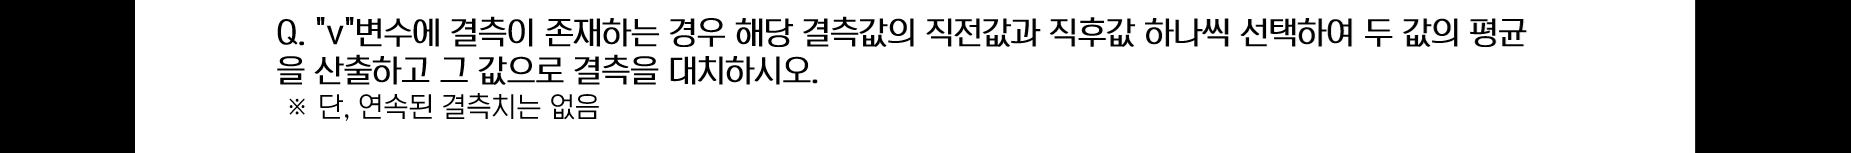

In [99]:
df_t = pd.DataFrame(dict(date = pd.date_range("2024-01-01", "2024-01-07"),
                         v = [100, 200, 300, np.nan, 500, 600, 700]))
df_t["v_s1"] = df_t["v"].shift(1)
# df_t["v_s2"] = df_t["v"].shift(2)
df_t["v_sn1"] = df_t["v"].shift(-1)
df_t["v_fill_1"] = np.where(df_t["v"].isna(),
                            (df_t["v_s1"] + df_t["v_sn1"]) / 2,
                            df_t["v"])
df_t["v_fill_2"] = df_t["v"].interpolate()
df_t

date      v   v_s1  v_sn1  v_fill_1  v_fill_2
0 2024-01-01  100.0    NaN  200.0     100.0     100.0
1 2024-01-02  200.0  100.0  300.0     200.0     200.0
2 2024-01-03  300.0  200.0    NaN     300.0     300.0
3 2024-01-04    NaN  300.0  500.0     400.0     400.0
4 2024-01-05  500.0    NaN  600.0     500.0     500.0
5 2024-01-06  600.0  500.0  700.0     600.0     600.0
6 2024-01-07  700.0  600.0    NaN     700.0     700.0

* .melt(): https://datadoctorblog.com/2023/05/07/Py-Basic-Pandas-Melt/

In [100]:
df_e = pd.read_csv("elec_load_2017_7d.csv")
df_e.head(1)

YEAR  MONTH  DAY   X1HR   X2HR   X3HR   X4HR   X5HR   X6HR   X7HR  ...  \
0  2017      1    1  60178  57862  56165  55135  54450  54401  54147  ...   

   X15HR  X16HR  X17HR  X18HR  X19HR  X20HR  X21HR  X22HR  X23HR  X24HR  
0  49213  49357  50362  53115  55205  55437  55348  55790  58195  59330  

[1 rows x 27 columns]

In [103]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"])
df_e_m.head(2)

YEAR  MONTH  DAY variable  value
0  2017      1    1     X1HR  60178
1  2017      1    2     X1HR  57067

In [104]:
df_e_m = df_e.melt(id_vars = ["YEAR", "MONTH", "DAY"],
                   var_name = "HOUR", value_name = "LOAD")
df_e_m.head(2)

YEAR  MONTH  DAY  HOUR   LOAD
0  2017      1    1  X1HR  60178
1  2017      1    2  X1HR  57067

In [105]:
df_e_m["h1"] = df_e_m["HOUR"].str.replace("X", "").str.replace("HR", "")
df_e_m["h2"] = df_e_m["HOUR"].str.replace("X|HR", "", regex = True) # regex는 정규표현식(regular expression)
df_e_m["h3"] = df_e_m["HOUR"].str.replace("[A-Z]", "", regex = True) # 영문 대문자
df_e_m["h4"] = df_e_m["HOUR"].str.replace("[^0-9]", "", regex = True) # 숫자를 제외한 나머지
df_e_m.tail()

YEAR  MONTH  DAY   HOUR   LOAD  h1  h2  h3  h4
163  2017      1    3  X24HR  71346  24  24  24  24
164  2017      1    4  X24HR  70834  24  24  24  24
165  2017      1    5  X24HR  66687  24  24  24  24
166  2017      1    6  X24HR  63214  24  24  24  24
167  2017      1    7  X24HR  69219  24  24  24  24

* pivoting: https://datadoctorblog.com/2023/05/10/Py-Basic-Pandas-Pivoting/

In [106]:
df = pd.read_csv("diamonds.csv")
df.head(1)

carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

In [114]:
df_g1 = df.groupby(["cut", "color"])["price"].max().reset_index()
df_g1.head(2)

cut color  price
0  Fair     D  16386
1  Fair     E  15584

In [ ]:
df_g2 = pd.crosstab(df["cut"], df["color"], values = df["price"], aggfunc = "max").reset_index()
df_g2

In [116]:
df_g3 = df.pivot_table(index = "cut", columns = "color", values = "price", aggfunc = "max").reset_index()
df_g3

color        cut      D      E      F      G      H      I      J
0           Fair  16386  15584  17995  18574  18565  18242  18531
1           Good  18468  18236  18686  18788  18640  18707  18325
2          Ideal  18693  18729  18780  18806  18760  18779  18508
3        Premium  18575  18477  18791  18741  18795  18823  18710
4      Very Good  18542  18731  18777  18818  18803  18500  18430

* 병합: https://datadoctorblog.com/2023/05/22/Py-Basic-Pandas-Merge/

In [117]:
df_bike = pd.read_csv("bike.csv")
df_b1 = df_bike.iloc[:4, 4:7]
df_b2 = df_bike.iloc[1:5, 5:8]

In [120]:
pd.concat([df_b1, df_b2])

weather  temp   atemp  humidity
0      1.0  9.84  14.395       NaN
1      1.0  9.02  13.635       NaN
2      1.0  9.02  13.635       NaN
3      1.0  9.84  14.395       NaN
1      NaN  9.02  13.635      80.0
2      NaN  9.02  13.635      80.0
3      NaN  9.84  14.395      75.0
4      NaN  9.84  14.395      75.0

In [121]:
pd.concat([df_b1, df_b2], axis = 1)

weather  temp   atemp  temp   atemp  humidity
0      1.0  9.84  14.395   NaN     NaN       NaN
1      1.0  9.02  13.635  9.02  13.635      80.0
2      1.0  9.02  13.635  9.02  13.635      80.0
3      1.0  9.84  14.395  9.84  14.395      75.0
4      NaN   NaN     NaN  9.84  14.395      75.0

In [122]:
pd.concat([df_b1, df_b2.reset_index(drop = True).add_suffix("_y")], axis = 1)

weather  temp   atemp  temp_y  atemp_y  humidity_y
0        1  9.84  14.395    9.02   13.635          80
1        1  9.02  13.635    9.02   13.635          80
2        1  9.02  13.635    9.84   14.395          75
3        1  9.84  14.395    9.84   14.395          75